In [151]:
using DataFrames, CSV
using Convex
using PyPlot
using ECOS
set_default_solver(ECOSSolver(verbose=0))
using ScikitLearn
using ScikitLearn.CrossValidation: train_test_split

In [152]:
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [153]:
tap_train_2003 = readtable("TAP_train_2003.csv");
tap_train_2008 = readtable("TAP_train_2008.csv");
tap_train_2015 = readtable("TAP_train_2015.csv");

In [154]:
X_nontest_2003 = convert(Array{Float64},tap_train_2003[:,2:42]);
y_nontest_2003 = convert(Array,tap_train_2003[:,43]);

X_nontest_2008 = convert(Array{Float64},tap_train_2008[:,2:42]);
y_nontest_2008 = convert(Array,tap_train_2008[:,43]);

X_nontest_2015 = convert(Array{Float64},tap_train_2015[:,2:42]);
y_nontest_2015 = convert(Array,tap_train_2015[:,43]);

In [155]:
X_train_2003, X_validate_2003, y_train_2003, y_validate_2003 = train_test_split(X_nontest_2003, y_nontest_2003, test_size=0.25, random_state=42);
X_train_2008, X_validate_2008, y_train_2008, y_validate_2008 = train_test_split(X_nontest_2008, y_nontest_2008, test_size=0.25, random_state=42);
X_train_2015, X_validate_2015, y_train_2015, y_validate_2015 = train_test_split(X_nontest_2015, y_nontest_2015, test_size=0.25, random_state=42);

In [156]:
function ridge_regression(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*sumsquares(w))
    solve!(p)
    return w.value
end

ridge_regression (generic function with 1 method)

In [157]:
function lasso(X,y; λ=1)
    d = size(X,2)
    w = Variable(d)
    p = minimize(sumsquares(X*w - y) + λ*norm(w,1))
    solve!(p)
    return w.value
end

lasso (generic function with 1 method)

In [158]:
w_ridge_2003 = ridge_regression(X_train_2003,y_train_2003; λ=1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
 912.507    
 492.725    
 273.716    
 847.132    
 417.31     
 385.557    
 112.346    
 -67.6273   
  -2.70699  
 148.717    
  -1.02555  
 185.16     
  19.3027   
   ⋮        
 510.7      
   0.0      
  -0.213001 
  -1.88313  
   4.35223  
   7.91283  
  62.4562   
  -0.156772 
 -56.6782   
 -10.9491   
  -0.0806579
 844.898    

In [159]:
w_ridge_2008 = ridge_regression(X_train_2008,y_train_2008; λ=1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
  991.876    
  476.427    
  260.019    
  885.075    
  430.555    
  427.826    
  133.663    
 -113.473    
   -0.168406 
  121.32     
  -18.1417   
  237.877    
   60.9206   
    ⋮        
  699.148    
    0.0      
    0.0      
   -5.79335  
    2.98965  
    5.69203  
   75.029    
   -0.878218 
  -94.2435   
  -19.2292   
   -0.0856038
  878.43     

In [160]:
w_ridge_2015 = ridge_regression(X_train_2015,y_train_2015; λ=1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
 982.924    
 324.888    
 312.074    
 989.715    
 384.817    
 455.564    
 142.543    
   0.0      
   0.0      
 204.684    
  94.4497   
 261.653    
  97.2491   
   ⋮        
 781.894    
   0.0      
   0.0      
  -5.40312  
  -7.31921  
  -0.174862 
  22.8582   
  -1.38869  
   0.0      
   0.0      
  -0.0895003
 982.942    

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

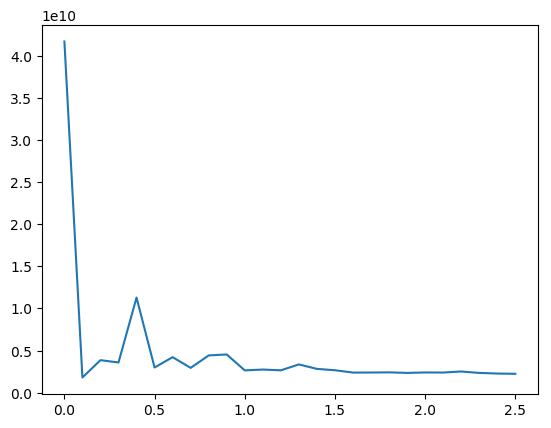

Problem status Error; solution may be inaccurate.


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x153239350>

In [161]:
error = Float64[]
λs = 0:.1:2.5
for λ in λs
    w = ridge_regression(X_train_2003,y_train_2003; λ=λ)
    push!(error, sum((y_test_2003 - X_test_2003*w).^2))
end
plot(λs, error)

In [162]:
w_lasso_2003 = lasso(X_train_2003,y_train_2003; λ=1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
 185053.0      
 -14874.2      
     -9.84856  
  16523.6      
 -36563.2      
 -36667.2      
 -36624.8      
      1.31203e5
 -41074.6      
 -21392.1      
 -22545.5      
 -21119.6      
 -22429.7      
      ⋮        
  18071.7      
      0.0      
     -2.95422e5
   7463.03     
  10905.7      
  11071.6      
  12122.5      
     -1.89039e5
  31044.4      
  27427.6      
     -0.063253 
     -1.00094e5

In [163]:
w_lasso_2008 = lasso(X_train_2008,y_train_2008; λ=1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
     -1.30923e5
  -7259.06     
      7.22201  
 -34962.1      
  59058.6      
  58976.7      
  59296.5      
 -57319.1      
 -78918.9      
  29705.1      
  28231.5      
  30021.6      
  29422.5      
      ⋮        
 -50886.8      
      0.0      
      0.0      
 -67373.1      
  21568.0      
  22462.1      
  23303.1      
     -1.23877e5
 -69900.2      
   5397.08     
     -0.0665748
  12640.9      

In [164]:
w_lasso_2015 = lasso(X_train_2015,y_train_2015; λ=1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Convex.ConicConstr}, ::Int64) at ./deprecated.jl:57
 [3] conic_form!(::Convex.SOCElemConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/soc_constraints.jl:50
 [4] conic_form!(::Convex.QolElemAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/second_order_cone/qol_elementwise.jl:41
 [5] conic_form!(::Convex.AdditionAtom, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/atoms/affine/add_subtract.jl:108
 [6] conic_form!(::Convex.EqConstraint, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/constraints/constraints.jl:43
 [7] conic_form!(::Convex.Problem, ::Convex.UniqueConicForms) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:99
 [8] conic_problem(::Convex.Problem) at /Users/tiffanyshih/.julia/v0.6/Convex/src/problems.jl:124
 [9] #solve!#25(::Bool, ::Bool, ::Bool, ::Functi

41×1 Array{Float64,2}:
      1.44517e5
  34822.1      
   -304.237    
 -13967.4      
   7648.91     
   7718.86     
   7663.4      
      0.0      
      0.0      
  49941.6      
  49915.6      
  49958.2      
  49648.2      
      ⋮        
  -8802.05     
      0.0      
      0.0      
 -39731.0      
  31826.1      
  33984.3      
  34031.6      
      1.062e5  
      0.0      
      0.0      
     -0.0736511
      1.44517e5

In [165]:
function mean_abs_err(X,y,w)
    n = size(X,1)
    sum = 0
    for i=1:n
        sum += abs.(y[i] - X[i,:]'*w)
    end
    return (sum+0.0)/n
end

mean_abs_err (generic function with 1 method)

In [166]:
function mean_abs_percent(X,y,w)
    n = size(X,1)
    sum = 0
    for i=1:n
        sum += abs.((y[i] - X[i,:]'*w)/y[i])
    end
    return 100*(sum+0.0)/n
end

mean_abs_percent (generic function with 1 method)

In [167]:
MAE_train_2003_ridge = mean_abs_err(X_train_2003, y_train_2003, w_ridge_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 758.952

In [168]:
MAE_validate_2003_ridge = mean_abs_err(X_validate_2003, y_validate_2003, w_ridge_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 756.088

In [169]:
MAPD_train_2003_ridge = mean_abs_percent(X_train_2003, y_train_2003, w_ridge_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 141.112

In [170]:
MAPD_validate_2003_ridge = mean_abs_percent(X_validate_2003, y_validate_2003, w_ridge_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 131.709

In [171]:
MAE_train_2008_ridge = mean_abs_err(X_train_2008, y_train_2008, w_ridge_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 839.874

In [172]:
MAE_validate_2008_ridge = mean_abs_err(X_validate_2008, y_validate_2008, w_ridge_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 836.948

In [173]:
MAPD_train_2008_ridge = mean_abs_percent(X_train_2008, y_train_2008, w_ridge_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 168.274

In [174]:
MAPD_validate_2008_ridge = mean_abs_percent(X_validate_2008, y_validate_2008, w_ridge_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 156.547

In [175]:
MAE_train_2015_ridge = mean_abs_err(X_train_2015, y_train_2015, w_ridge_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 650.96

In [176]:
MAE_validate_2015_ridge = mean_abs_err(X_validate_2015, y_validate_2015, w_ridge_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 661.246

In [177]:
MAPD_train_2015_ridge = mean_abs_percent(X_train_2015, y_train_2015, w_ridge_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 64.6141

In [178]:
MAPD_validate_2015_ridge = mean_abs_percent(X_validate_2015, y_validate_2015, w_ridge_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 64.2683

In [179]:
MAE_train_2003_lasso = mean_abs_err(X_train_2003, y_train_2003, w_lasso_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 702.942

In [180]:
MAE_validate_2003_lasso = mean_abs_err(X_validate_2003, y_validate_2003, w_lasso_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 711.676

In [181]:
MAPD_train_2003_lasso = mean_abs_percent(X_train_2003, y_train_2003, w_lasso_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 100.083

In [182]:
MAPD_validate_2003_lasso = mean_abs_percent(X_validate_2003, y_validate_2003, w_lasso_2003)

1×1 RowVector{Float64,Array{Float64,1}}:
 95.5695

In [183]:
MAE_train_2008_lasso = mean_abs_err(X_train_2008, y_train_2008, w_lasso_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 686.694

In [184]:
MAE_validate_2008_lasso = mean_abs_err(X_validate_2008, y_validate_2008, w_lasso_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 703.613

In [185]:
MAPD_train_2008_lasso = mean_abs_percent(X_train_2008, y_train_2008, w_lasso_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 129.484

In [186]:
MAPD_validate_2008_lasso = mean_abs_percent(X_validate_2008, y_validate_2008, w_lasso_2008)

1×1 RowVector{Float64,Array{Float64,1}}:
 113.864

In [187]:
MAE_train_2015_lasso = mean_abs_err(X_train_2015, y_train_2015, w_lasso_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 564.328

In [188]:
MAE_validate_2015_lasso = mean_abs_err(X_validate_2015, y_validate_2015, w_lasso_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 580.503

In [189]:
MAPD_train_2015_lasso = mean_abs_percent(X_train_2015, y_train_2015, w_lasso_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 78.6536

In [190]:
MAPD_validate_2015_lasso = mean_abs_percent(X_validate_2015, y_validate_2015, w_lasso_2015)

1×1 RowVector{Float64,Array{Float64,1}}:
 62.1661

In [191]:
w_2003 = X_train_2003\y_train_2003;
w_2008 = X_train_2008\y_train_2008;
w_2015 = X_train_2015\y_train_2015;

In [192]:
MAE_train_2003 = mean_abs_err(X_train_2003, y_train_2003, w_2003)

488.0272832418555

In [193]:
MAE_validate_2003 = mean_abs_err(X_validate_2003, y_validate_2003, w_2003)

481.4730503649254

In [194]:
MAPD_train_2003 = mean_abs_percent(X_train_2003, y_train_2003, w_2003)

60.266713113041405

In [195]:
MAPD_validate_2003 = mean_abs_percent(X_validate_2003, y_validate_2003, w_2003)

60.367379458109

In [196]:
MAE_train_2008 = mean_abs_err(X_train_2008, y_train_2008, w_2008)

489.75906251942894

In [197]:
MAE_train_2015 = mean_abs_err(X_train_2015, y_train_2015, w_2015)

430.10184603567075

In [198]:
w_lasso_2003[1:15]

15-element Array{Float64,1}:
 185053.0      
 -14874.2      
     -9.84856  
  16523.6      
 -36563.2      
 -36667.2      
 -36624.8      
      1.31203e5
 -41074.6      
 -21392.1      
 -22545.5      
 -21119.6      
 -22429.7      
  -6185.27     
  -6223.7      

In [199]:
w_lasso_2003[16:30]

15-element Array{Float64,1}:
  -2109.87
  -6547.62
      0.0 
 -18622.1 
 -18463.6 
 -18505.8 
 -18755.3 
 -18561.6 
 -38685.5 
 -34555.9 
      0.0 
  17237.1 
      0.0 
  17764.1 
  18071.7 

In [200]:
w_lasso_2003[31:41]

11-element Array{Float64,1}:
     0.0      
    -2.95422e5
  7463.03     
 10905.7      
 11071.6      
 12122.5      
    -1.89039e5
 31044.4      
 27427.6      
    -0.063253 
    -1.00094e5

In [201]:
w_lasso_2008[1:15]

15-element Array{Float64,1}:
     -1.30923e5
  -7259.06     
      7.22201  
 -34962.1      
  59058.6      
  58976.7      
  59296.5      
 -57319.1      
 -78918.9      
  29705.1      
  28231.5      
  30021.6      
  29422.5      
  37549.3      
  37345.1      

In [202]:
w_lasso_2008[16:30]

15-element Array{Float64,1}:
  37849.1      
  37123.8      
      0.0      
  13249.6      
  13276.9      
  13296.8      
  13446.7      
  13434.4      
      1.06456e5
  30775.0      
      0.0      
 -51728.7      
      0.0      
 -51370.5      
 -50886.8      

In [203]:
w_lasso_2008[31:41]

11-element Array{Float64,1}:
      0.0      
      0.0      
 -67373.1      
  21568.0      
  22462.1      
  23303.1      
     -1.23877e5
 -69900.2      
   5397.08     
     -0.0665748
  12640.9      

In [204]:
w_lasso_2015[1:15]

15-element Array{Float64,1}:
      1.44517e5
  34822.1      
   -304.237    
 -13967.4      
   7648.91     
   7718.86     
   7663.4      
      0.0      
      0.0      
  49941.6      
  49915.6      
  49958.2      
  49648.2      
  15093.8      
  14998.2      

In [205]:
w_lasso_2015[16:30]

15-element Array{Float64,1}:
   13067.1      
   14737.1      
   15555.7      
   48854.4      
   48737.1      
   48828.5      
   48680.8      
   48989.7      
      -3.67456e5
 -412827.0      
      -1.88939e5
   -9998.35     
      -1.88939e5
   -9730.96     
   -8802.05     

In [206]:
w_lasso_2015[31:41]

11-element Array{Float64,1}:
      0.0      
      0.0      
 -39731.0      
  31826.1      
  33984.3      
  34031.6      
      1.062e5  
      0.0      
      0.0      
     -0.0736511
      1.44517e5

In [234]:
using ScikitLearn: fit!, predict
using PyCall

In [235]:
ridge_reg = fit!(Ridge(),X_train_2003,y_train_2003)

PyObject Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [237]:
ridge_reg[:coef_]

41-element Array{Float64,1}:
  693.628    
  417.682    
    9.95949  
 1682.01     
  408.929    
  459.868    
  490.125    
 -693.628    
 -665.295    
  146.921    
 -551.633    
  278.771    
 -291.74     
    ⋮        
 1147.95     
    0.0      
 -596.105    
 -826.653    
 -234.4      
   26.4881   
  249.913    
 -259.252    
 -542.251    
 -151.377    
   -0.0611317
    0.0      